In [4]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

## <font color='green'>Topics</font>

#### what are the most popular topics for different lyrics (are they the same)

#### how many words are aritst using 

#### is the popular words appear the same for different origin


## <font color='green'>Packages</font>

In [5]:
import wordcloud
from wordcloud import WordCloud

In [6]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#import wordcloud
#from wordcloud.wordCcloud import WordCloud
from collections import Counter

In [68]:
# import warnings 
# warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')
# warnings.filterwarnings(action='once')

## <font color='green'>Data & Global variable</font>

In [7]:
lyrics = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/output/dt_lyrics.csv')
artists = pd.read_csv('/Users/rong/Documents/Columbia_python_jupyter_notebook/fall2019-proj1--Sixuan-Li/data/artists.csv')

In [8]:
#some operation for data cleaning 
artists_filter = artists.dropna()
lyrics_copy = lyrics.copy()
#join df of aritst and lyrics drop all the NAN values
df_join_lyrics_artist = lyrics_copy.join(artists_filter.set_index('Artist'), on = 'artist').dropna()

In [9]:
#Global varibales, cols that would be keeped
keep_coulms_label = [ 'song', 'year', 'artist', 'genre', 'id', 'stemmedwords']
keep_label_join = ['year', 'artist', 'genre', 'stemmedwords', 'Intro', 'Formed', 'Members', 'Origin']

In [15]:
genre_list = list(set(lyrics['genre']))
artist_list =  list(set(df_join_lyrics_artist['artist']))
origin_list = list(set(df_join_lyrics_artist['Origin']))

## <font color='green'>Some EDA work</font>

In [10]:
len(list(set(artists_filter['Origin'])))/len(list(artists_filter['Origin']))

0.5652173913043478

In [11]:
len(list(set(artists_filter['Formed'])))/len(list(artists_filter['Formed'])) #different year

0.16600790513833993

In [12]:
len(list(set(artists_filter['Artist'])))/len(list(artists_filter['Artist']))

1.0

In [17]:
lyrics['genre'].value_counts().plot.bar()

In [21]:
df_join_lyrics_artist['Formed'].value_counts().plot.bar()

In [42]:
def df_genre(genre):
    """sub original lyrics dataframe by genre
    Input
    ------
        genre: different genre, a string
    Return
    ------
        dataframe that only contain rows that belong to input genre"""
    dataframe_all =  lyrics[lyrics['genre']==genre]
    return dataframe_all[keep_coulms_label]

def df_formed(formed):
    """sub original lyrics dataframe by formed yaer
    Input
    ------
        formed: different formed, a string
    Return
    ------
        dataframe that only contain rows that belong to input year"""
    dataframe_all =  df_join_lyrics_artist[df_join_lyrics_artist['Formed'] == formed]
    return dataframe_all[keep_label_join]

def df_artist(artist):
    """sub original lyrics dataframe by artist
    Input
    ------
        artist: different people, a string
    Return
    ------
        dataframe that only contain rows that belong to input artist"""
    dataframe_all =  df_join_lyrics_artist[df_join_lyrics_artist['artist'] == artist]
    return dataframe_all[keep_label_join]
    

def df_origin(origin_str):
    """sub original lyrics dataframe by origin
    Input
    ------
        origin_str: a string
    Return
    ------
        dataframe that only contain rows that belong to origin"""
    dataframe_all =  df_join_lyrics_artist[df_join_lyrics_artist['Origin'] == origin_str]
    return dataframe_all[keep_label_join]



    
def series_stemmedwords (dataframe_genre):
    """return a pandas series that only contain stemmedwords"""
    return dataframe_genre['stemmedwords']

def df_add_words(dataframe_genre):
    #https://sigdelta.com/blog/text-analysis-in-pandas/
    dataframe_genre_add = dataframe_genre.copy()
    dataframe_genre_add['words'] = dataframe_genre_add.stemmedwords.str.strip().str.split('[\W_]+')
    return dataframe_genre_add

def list_all_words(dataframe_add):
    """get a list contain all words in stemmwords
    Input
    -----
        dataframe_add : a dataframe, should be the one add words col
    Return
    ----
        a list contain every words from words col"""

    combine_list_words = list()
    for l in dataframe_add['words']:
        combine_list_words.append(l)
    combine_list_words = [val for sublist in combine_list_words for val in sublist] 
    return combine_list_words

def float_words_using(dataframe_add):
    return len(set(list_all_words(dataframe_add)))/len(list_all_words(dataframe_add))


def float_words_artist_main(artist_name):
    df_artisttest = df_artist(artist_name)
    df_artisttest_add = df_add_words(df_artisttest)
    return [artist_name,float_words_using(df_artisttest_add)]



def df_counts_words(list_words,int_common):
    """get a df with only words and counts
    Input
    ----
        list_words: a list of words that want to count,should be the output of list_all_words
        int_common: a int, the first how many words with highest freq want to show
    Return
    ------
        a dataframe that only contain words and counts, from max to min order"""
    counts = Counter(list_words)
    df_counts = pd.DataFrame(
    {'words': list(counts.keys()),
     'counts': list(counts.values())
    })
    df_counts = df_counts.sort_values('counts',ascending=False)
    if int_common is not None:
        return df_counts.iloc[0:int_common]
    return df_counts


def df_counts_word_main(classification_str,label,int_common = None):
    """dataframe of what words been used most by artist of genre
    Input
    ----
        classfication_str: a string, name of a artist or type of genre or origin_address
        label: artist, or type,string
        int_common: a int, show the most several words
    Return
    -----
        dataframe with words and time of words appear"""
    if label == 'artist':
        df_get = df_artist(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return df_counts_words(list_artist_add,int_common)
    if label == 'genre':
        df_get = df_genre(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return df_counts_words(list_artist_add,int_common)
    if label == 'origin':
        df_get = df_origin(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return df_counts_words(list_artist_add,int_common)
    
    
    

def word_cloud_plot(list_words,int_common=None):
    
    #https://stackoverflow.com/questions/38465478/wordcloud-from-data-frame-with-frequency-python
    d = {}
    for a, x in df_counts_words(list_words,int_common).values:
        d[a] = x
    #convert list to string and generate
    unique_string=(" ").join(list_words)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

def word_cloud_main(classification_str,label,int_common=None):
    """main function for word cloud via genre
    Input
    ----
        classfication_str: a string, name of a artist or type of genre or origin_address
        label: artist, or type,string
        int_common: a int, show the most several words
    Return
    ----
        a plot of wordcloud"""
    
    if label == 'artist':
        df_get = df_artist(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return word_cloud_plot(list_artist_add,int_common)
    if label == 'genre':
        df_get = df_genre(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return word_cloud_plot(list_artist_add,int_common)
    if label == 'origin':
        df_get = df_origin(classification_str)
        df_get_add = df_add_words(df_get)
        list_artist_add = list_all_words(df_get_add)
        return word_cloud_plot(list_artist_add,int_common)

def list_counts_common_word(label,int_common = None):
    """return a nested list with popular words count
    Input
    ------
        label: artist/genre,origin, string, uesed to classify the type
        int_common: how many most words want to show
    Return
    -----
        a nested list contain all int_common in given label"""
    l_test_sum = []
    if label == 'origin':
        for position in origin_list:
            df_test = df_counts_word_main(position,'origin',int_common)
            l_test = list(df_test['words'])
            l_test_sum.append(l_test)
        return [val for sublist in l_test_sum for val in sublist] 
    if label == 'genre':
        for position in genre_list:
            df_test = df_counts_word_main(position,'genre',int_common)
            l_test = list(df_test['words'])
            l_test_sum.append(l_test)
        return [val for sublist in l_test_sum for val in sublist] 
    if label == 'artist':
        for position in artist_list:
            df_test = df_counts_word_main(position,'artist',int_common)
            l_test = list(df_test['words'])
            l_test_sum.append(l_test)
        return [val for sublist in l_test_sum for val in sublist] 
    
   

In [98]:
#print(any(i in l_t1 for i in l_t2)) 


[False, True, True, False, True, True, True, False, False, False]


In [40]:
df_test = df_counts_word_main(origin_list[10],'origin',int_common=20)

df_test2 = df_counts_word_main(origin_list[9],'origin',int_common=20)

df_test3 = df_counts_word_main(origin_list[8],'origin',int_common=20)
l_t1 = list(df_test['words'])
l_t2 = list(df_test2['words'])
l_t3 = list(df_test3['words'])
l_t_list = [l_t2,l_t3]

In [61]:
l_list = list_counts_common_word('artist',10)
df_test = df_counts_words(l_list,None).head(10)
plt.bar(df_test['words'],df_test['counts'])

In [92]:
def bar_plot_freq(label,int_common,int_words = 10):
    """retun a bar plot to common words
    label: string
    int_common
    int_words:int, for how many words display in the plot"""
    if label == 'artist':
        l_list = list_counts_common_word('artist',int_common)
        df_test = df_counts_words(l_list,int_words)
        return plt.bar(df_test['words'],df_test['counts'])
    if label == 'genre':
        l_list = list_counts_common_word('genre',int_common)
        df_test = df_counts_words(l_list,int_words)
        return plt.bar(df_test['words'],df_test['counts'])
    if label == 'origin':
        l_list = list_counts_common_word('origin',int_common)
        df_test = df_counts_words(l_list,int_words)
        return plt.bar(df_test['words'],df_test['counts'])

In [93]:
bar_plot_freq('origin',10)

<BarContainer object of 10 artists>

In [94]:
bar_plot_freq('artist',10)

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

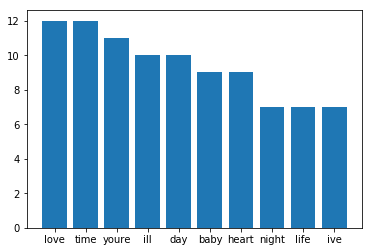

In [95]:
bar_plot_freq('genre',10)

In [ ]:
plt.bar(df_test['words'],df_test['counts'])

In [50]:
df_counts_words(l_list,None).head(20)

words  counts
2      time     199
6      love     180
4     youre     179
3       ill     104
7       day     103
12      ive      93
45     life      88
35     eyes      65
1      baby      62
41    night      61
15    heart      61
13    world      59
30     live      48
61     girl      30
48      die      30
26     mind      29
65  waiting      24
10     shes      24
37     home      24
38    light      22

In [31]:
l_word_dup = []
l_word_dup_sum = []
for l in l_list:
    for word in l:
        if word in l_t1:
            l_word_dup.append(word)
    l_word_dup_sum.append(l_word_dup)


[['time',
  'love',
  'day',
  'time',
  'day',
  'love',
  'ive',
  'world',
  'love',
  'day',
  'time',
  'ive',
  'mind',
  'love',
  'time',
  'dream',
  'live',
  'love',
  'time',
  'mind',
  'ive',
  'eyes',
  'ive',
  'love',
  'time',
  'eyes',
  'love',
  'time',
  'life',
  'day',
  'time',
  'mind',
  'die',
  'eyes',
  'ive',
  'time',
  'mind',
  'die',
  'life',
  'live',
  'time',
  'day',
  'life',
  'live',
  'day',
  'time',
  'hear',
  'love',
  'world',
  'time',
  'ive',
  'change',
  'mind',
  'life',
  'love',
  'life',
  'love',
  'time',
  'ive',
  'love',
  'mind',
  'time',
  'eyes',
  'love',
  'time',
  'life',
  'love',
  'ive',
  'day',
  'time',
  'day',
  'live',
  'lost',
  'love',
  'time',
  'ive',
  'day',
  'life',
  'world',
  'live',
  'time',
  'life',
  'world',
  'live',
  'die',
  'time',
  'time',
  'love',
  'ive',
  'time',
  'love',
  'ive',
  'day',
  'time',
  'life',
  'eyes',
  'day',
  'love',
  'life',
  'ive',
  'eyes',
  'love',

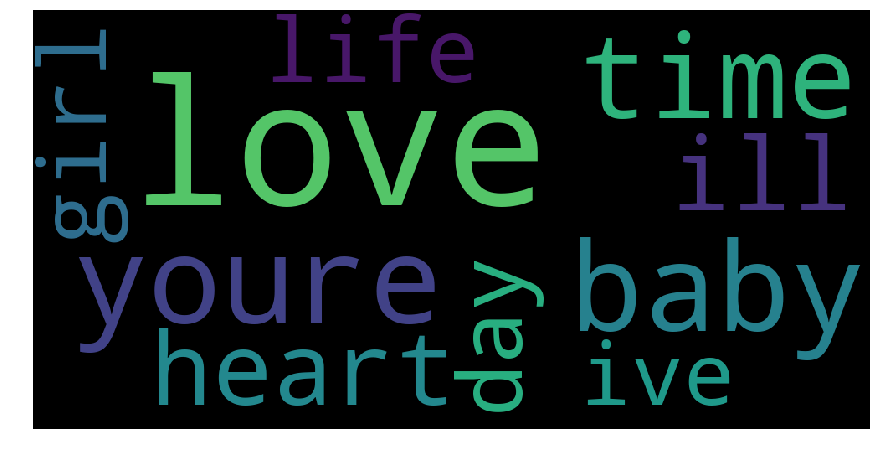

In [19]:
word_cloud_main('Pop','genre',int_common=10)

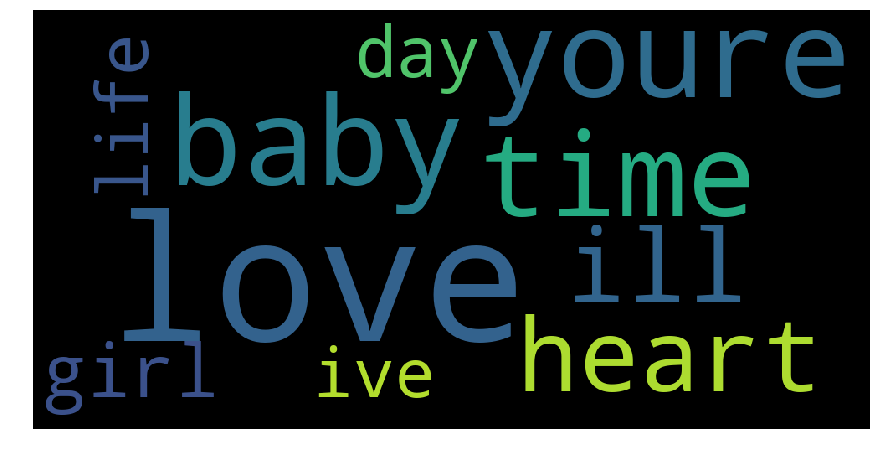

In [37]:
word_cloud_via_genre('Pop',int_common=10)

In [ ]:
word_cloud_via_genre('Folk',int_common=10)

In [ ]:
df_join_lyrics_artist.head()

In [ ]:
list(set(lyrics['df_join_lyrics_artist']))


In [ ]:
df_add_pop = df_add_words(df_genre('Pop'))
l_pop = .
(df_add_pop)

Jazz


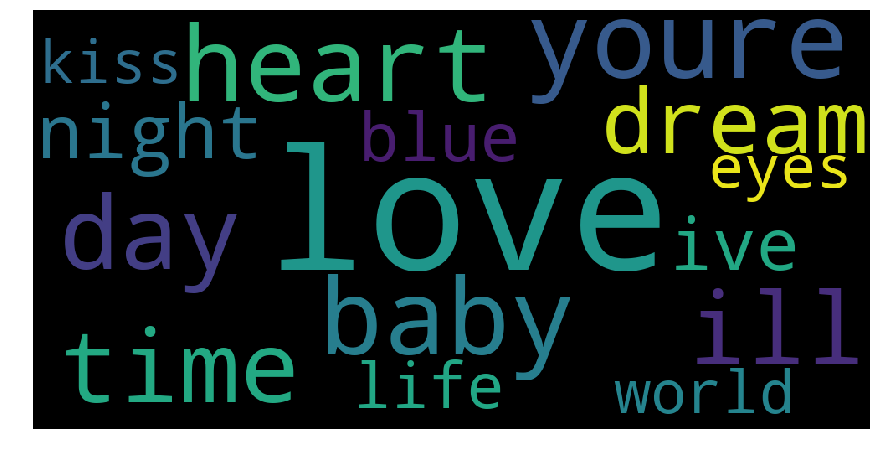

R&B


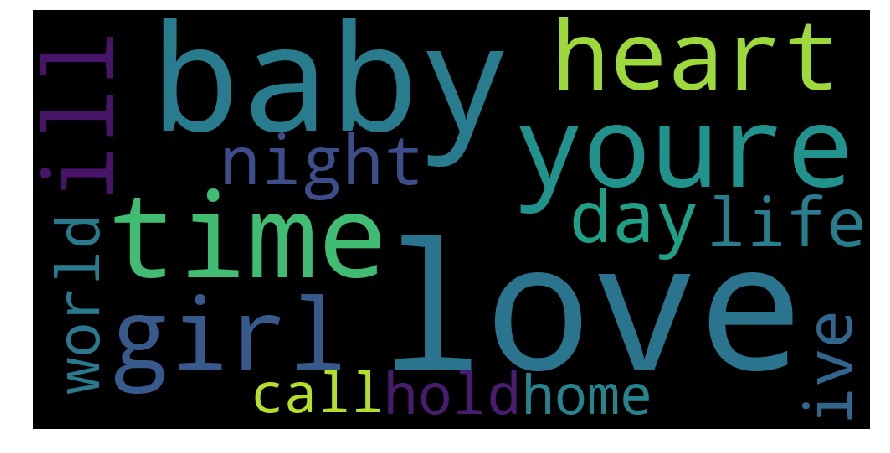

Pop


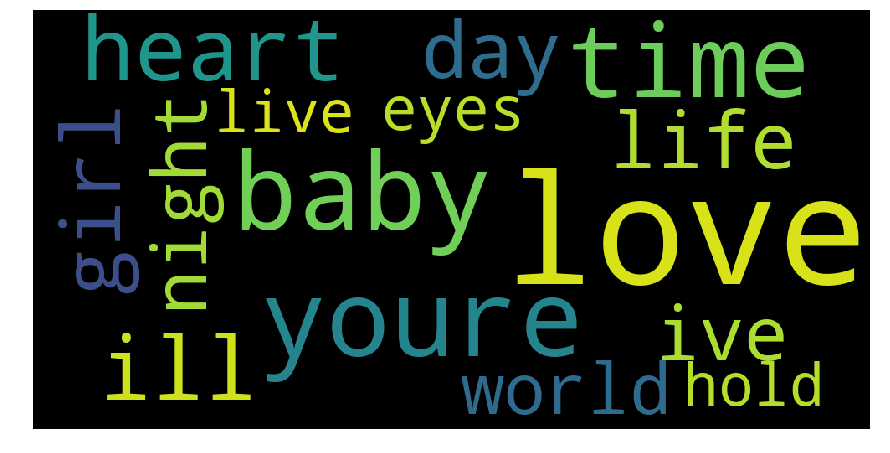

Country


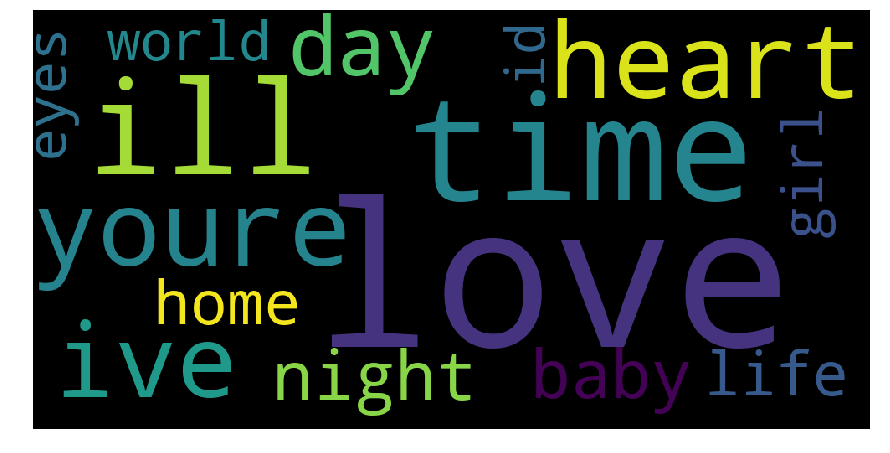

Not Available


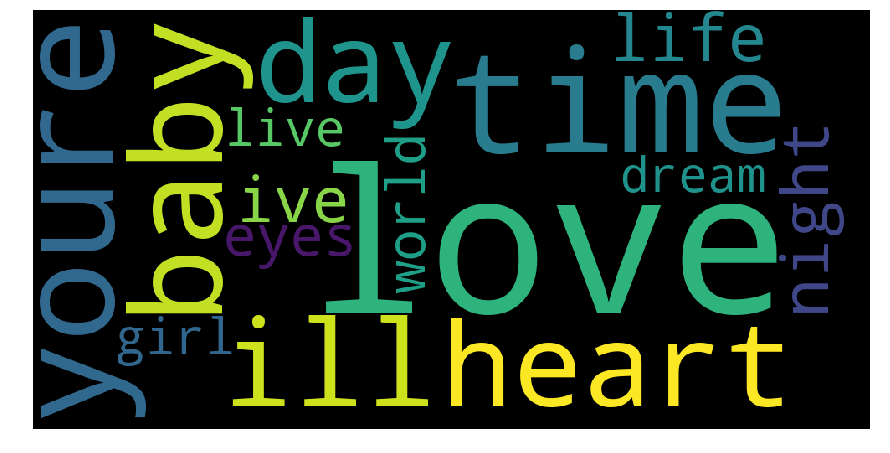

Electronic


Folk


Hip-Hop


Other


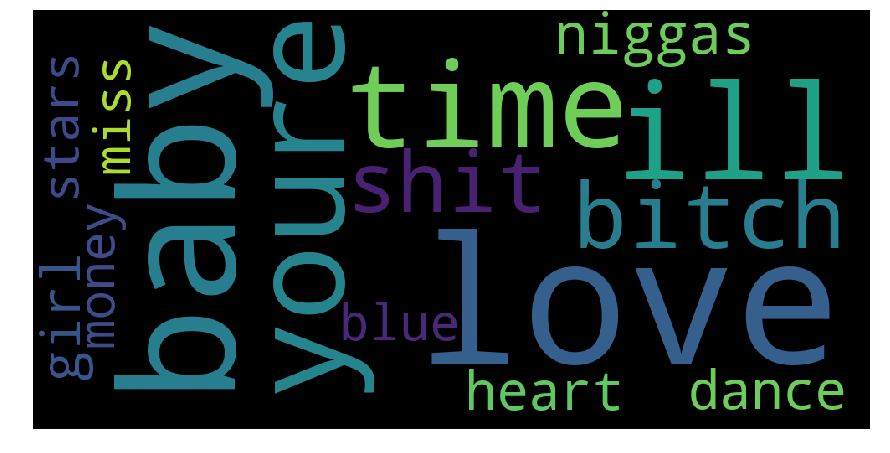

Rock


Indie


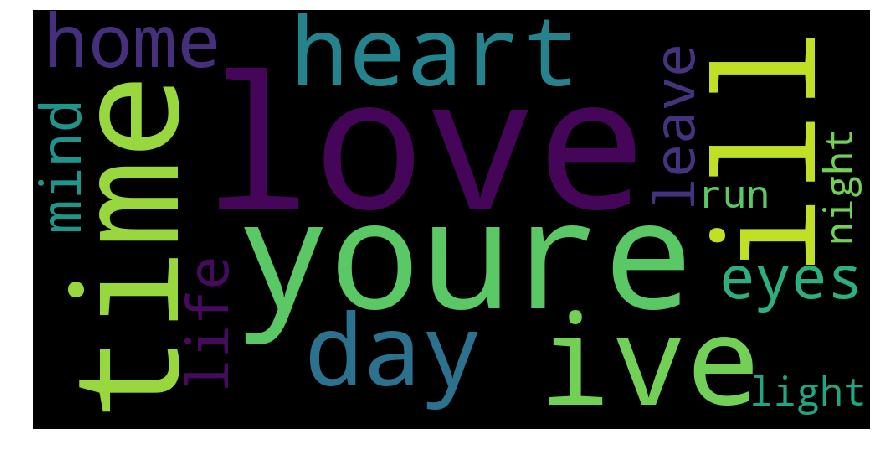

Metal


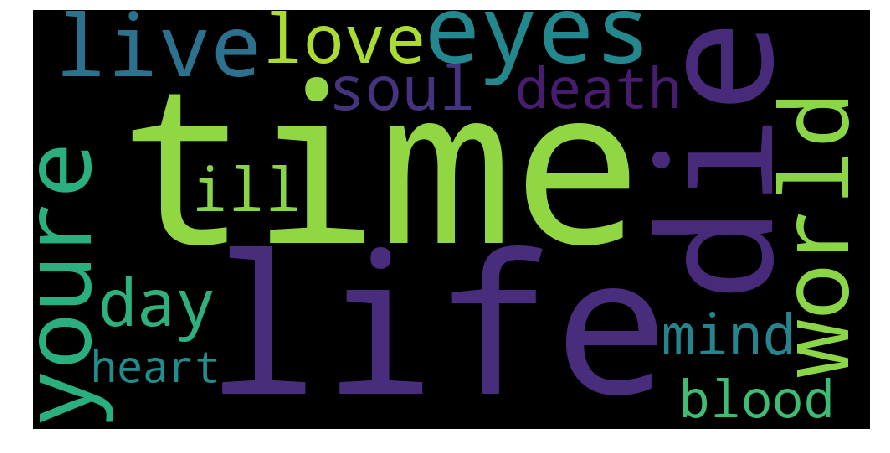

In [43]:
for ly in genre_list:
    print(ly)
    word_cloud_via_genre(ly,15)

In [20]:
# A dataframe that counts for different artist, do they tend to repeat words or now. the larger the value is, the less likely they repeat the words
lists_artist_floatwords=[]
for name in artist_list:
    lists_artist_floatwords.append(float_words_artist_main(name))
df_artist_percentage_unique = pd.DataFrame(lists_artist_floatwords,columns=['artist','percentage_unique_words'])
df_artist_percentage_unique = df_artist_percentage_unique.sort_values('percentage_unique_words',ascending=False)

In [23]:
df_artist_percentage_unique

artist  percentage_unique_words
71                      focus                 0.826087
124                 daughters                 0.740648
202                 cryptopsy                 0.675120
3                    au-pairs                 0.662531
107                   gasolin                 0.656566
116               augie-march                 0.626984
210   crosby-still-nash-young                 0.626667
159                     botch                 0.609137
201             classics-four                 0.606061
228  clap-your-hands-say-yeah                 0.554384
54                gipsy-kings                 0.545455
179                      blof                 0.543902
139                      dawn                 0.543361
185              grave-digger                 0.518657
150             fiction-plane                 0.516932
196                   aborted                 0.513221
229          australian-crawl                 0.511486
193               classics-iv                 0.502347
113             bad-astronaut                 0.488067
109         grant-lee-buffalo                 0.470465
101                 grandaddy                 0.469484
118              darkest-hour                 0.452948
60           death-from-above                 0.439086
27              dave-matthews                 0.438776
135                  agalloch                 0.428957
215            carlos-santana                 0.426178
222           fair-to-midland                 0.423747
86           babes-in-toyland                 0.422053
31                    eve-six                 0.421053
224                  godflesh                 0.420112
..                        ...                      ...
163              all-time-low                 0.153610
191              cypress-hill                 0.152464
64                        afi                 0.152021
89                bad-company                 0.151424
36                  blink-182                 0.151350
40                     dokken                 0.151033
55                  disturbed                 0.150578
37            black-eyed-peas                 0.150556
123           earth-wind-fire                 0.150198
164               duran-duran                 0.148759
94                def-leppard                 0.148320
77              black-sabbath                 0.147273
198                air-supply                 0.146774
95                    alabama                 0.145582
211                   boney-m                 0.144607
147             dream-theater                 0.144478
218                      abba                 0.141620
155                      blue                 0.141260
144               cheap-trick                 0.140540
59                 april-wine                 0.139343
186   bullet-for-my-valentine                 0.133905
32         dave-matthews-band                 0.127867
142                   beatles                 0.121524
16                boyz-ii-men                 0.121047
61              fleetwood-mac                 0.117015
58                      ac-dc                 0.116283
39               fall-out-boy                 0.115470
18                dragonforce                 0.114739
170                  bon-jovi                 0.087382
122                 daft-punk                 0.078746

[247 rows x 2 columns]